In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Step 2: Explore and Standardize the data

In [59]:
df=pd.DataFrame(X, columns=feature_names)
df['Target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [60]:
scaler = StandardScaler()
X_scales= scaler.fit_transform(X)

# Step 3: Apply PCA

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scales)
X_pca[:5]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082]])

# Step 4: Visualize PCA Output in 2D

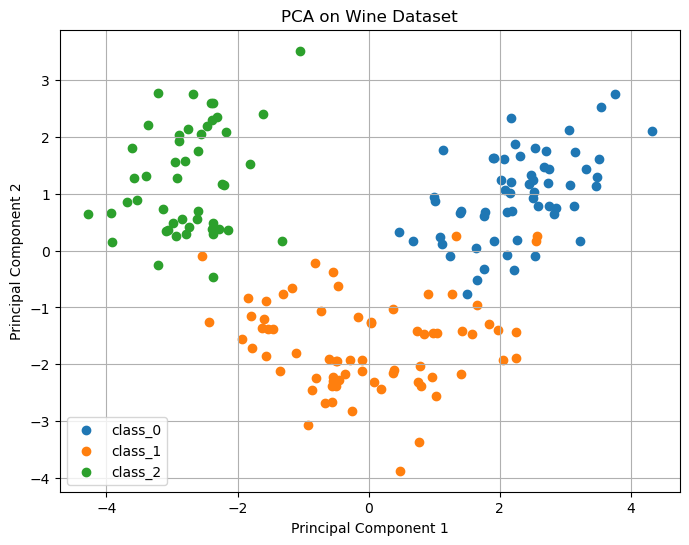

In [64]:
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i,0], X_pca[y==i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Explained Variance Ratio & Scree Plot

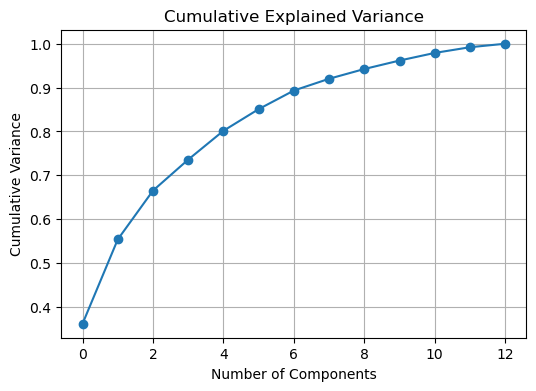

In [66]:
pca_full=PCA().fit(X_scales)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

# t-SNE(from sklearn.decomposition import PCA)

In [68]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [69]:
iris = load_iris()
X=iris.data
y=iris.target
target_names=iris.target_names

In [70]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply t-SNE

In [73]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
x_tsne = tsne.fit_transform(X_scaled)

df_tsne=pd.DataFrame(x_tsne, columns=["Dim1","Dim2"])
df_tsne['Target']=y

C:\Users\sania\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


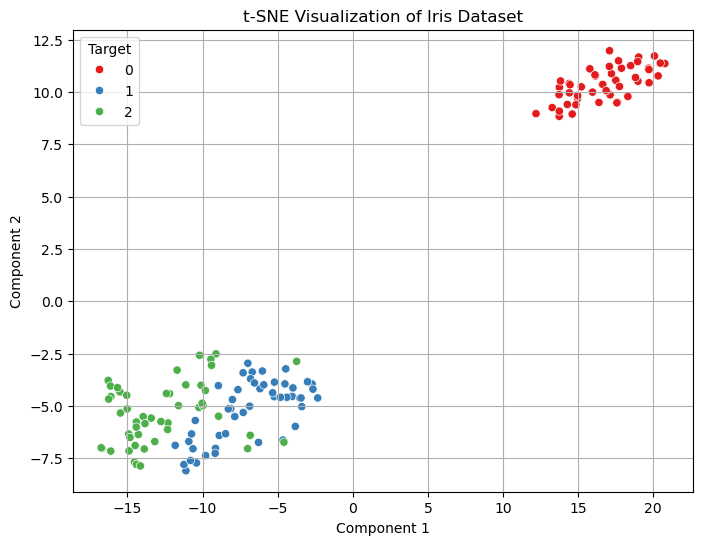

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_tsne,x="Dim1",y="Dim2",hue="Target",palette="Set1")
plt.title("t-SNE Visualization of Iris Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()